In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [5]:
def load_and_clean_data():
    df = pd.read_csv('DataFaskesBPJS2019.csv')
    return df

In [6]:
df = load_and_clean_data()

In [9]:
df.columns = ['NoLink', 'Provinsi', 'KotaKab', 'Link', 'TipeFaskes', 'No', 'KodeFaskes', 'NamaFaskes', 'LatLongFaskes', 'AlamatFaskes', 'TelpFaskes']

In [10]:
for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip()

In [13]:
import pandas as pd
import re

def extract_coordinates(url):
    if pd.isna(url):
        return pd.NA, pd.NA
    match = re.search(r'@(-?\d+\.\d+),(-?\d+\.\d+)', url)
    if match:
        return float(match.group(1)), float(match.group(2))
    return pd.NA, pd.NA

def apply_extraction(df): # New Function to wrap the logic to fix indentation
    df[['Latitude', 'Longitude']] = df['LatLongFaskes'].apply(
        lambda x: pd.Series(extract_coordinates(x))
    )

    return df

In [18]:
def analyze_distribution(df):
    # 1. Analisis per Provinsi
    prov_dist = df['Provinsi'].value_counts()

    # 2. Analisis per Tipe Faskes
    type_dist = df['TipeFaskes'].value_counts()

    # 3. Analisis per Kota/Kabupaten
    city_dist = df['KotaKab'].value_counts().head(20)

    # Visualisasi
    import matplotlib.pyplot as plt # Import necessary library

    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    prov_dist.head(10).plot(kind='bar')
    plt.title('10 Provinsi dengan Jumlah Faskes Terbanyak')
    plt.xticks(rotation=45)

    plt.subplot(2, 1, 2)
    type_dist.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Distribusi Tipe Faskes')

    plt.tight_layout()
    plt.show()

    return prov_dist, type_dist, city_dist


In [19]:
def analyze_density(df):
    density = df.groupby(['Provinsi', 'KotaKab']).size().reset_index(name='JumlahFaskes')
    density = density.sort_values('JumlahFaskes', ascending=False)

    # Visualisasi top 20 kota/kabupaten dengan faskes terbanyak
    plt.figure(figsize=(15, 6))
    plt.bar(range(20), density['JumlahFaskes'].head(20))
    plt.xticks(range(20), density['KotaKab'].head(20), rotation=45)
    plt.title('20 Kota/Kabupaten dengan Jumlah Faskes Terbanyak')
    plt.tight_layout()
    plt.show()

    return density

In [20]:
def analyze_type_distribution(df):
    type_prov = pd.crosstab(df['Provinsi'], df['TipeFaskes'])

    # Visualisasi untuk 10 provinsi teratas
    plt.figure(figsize=(15, 8))
    type_prov.head(10).plot(kind='bar', stacked=True)
    plt.title('Distribusi Tipe Faskes per Provinsi (Top 10)')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return type_prov


In [21]:
def generate_report(df, prov_dist, type_dist, density):
    report = f"""
    Analisis Data Fasilitas Kesehatan BPJS

    1. Statistik Umum:
    - Total Faskes: {len(df)}
    - Jumlah Provinsi: {df['Provinsi'].nunique()}
    - Jumlah Kota/Kabupaten: {df['KotaKab'].nunique()}
    - Jumlah Tipe Faskes: {df['TipeFaskes'].nunique()}

    2. Top 5 Provinsi dengan Faskes Terbanyak:
    {prov_dist.head().to_string()}

    3. Distribusi Tipe Faskes:
    {type_dist.to_string()}

    4. Top 5 Kota/Kabupaten dengan Faskes Terbanyak:
    {density.head().to_string()}
    """

    with open('laporan_analisis_faskes.txt', 'w') as f:
        f.write(report)

    return report

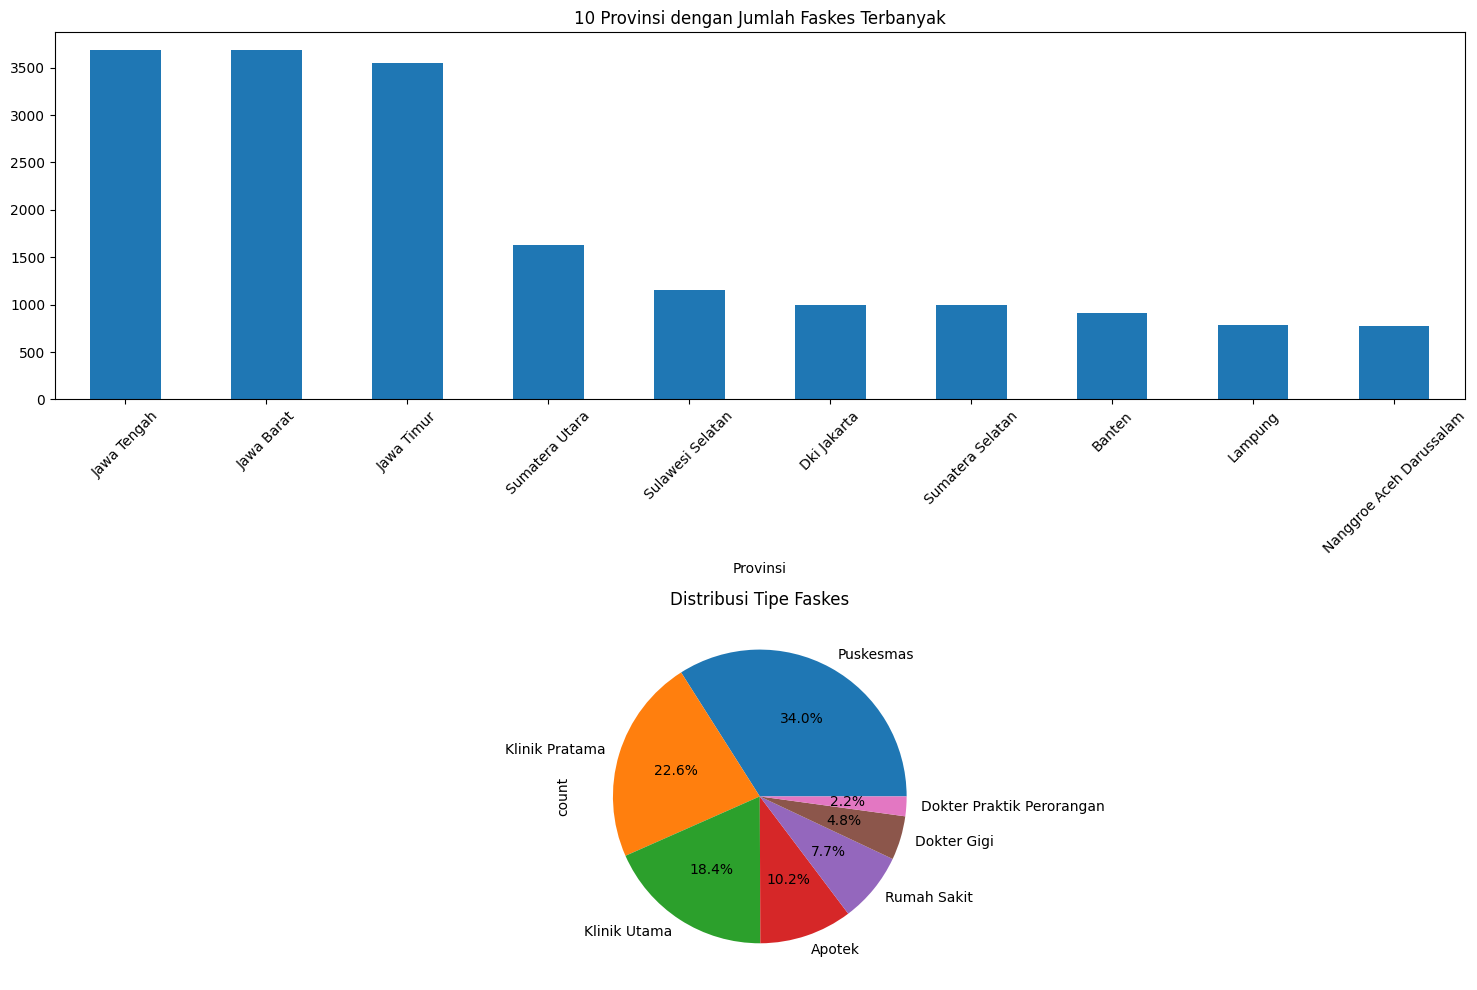

) missing from current font.
  plt.tight_layout()
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


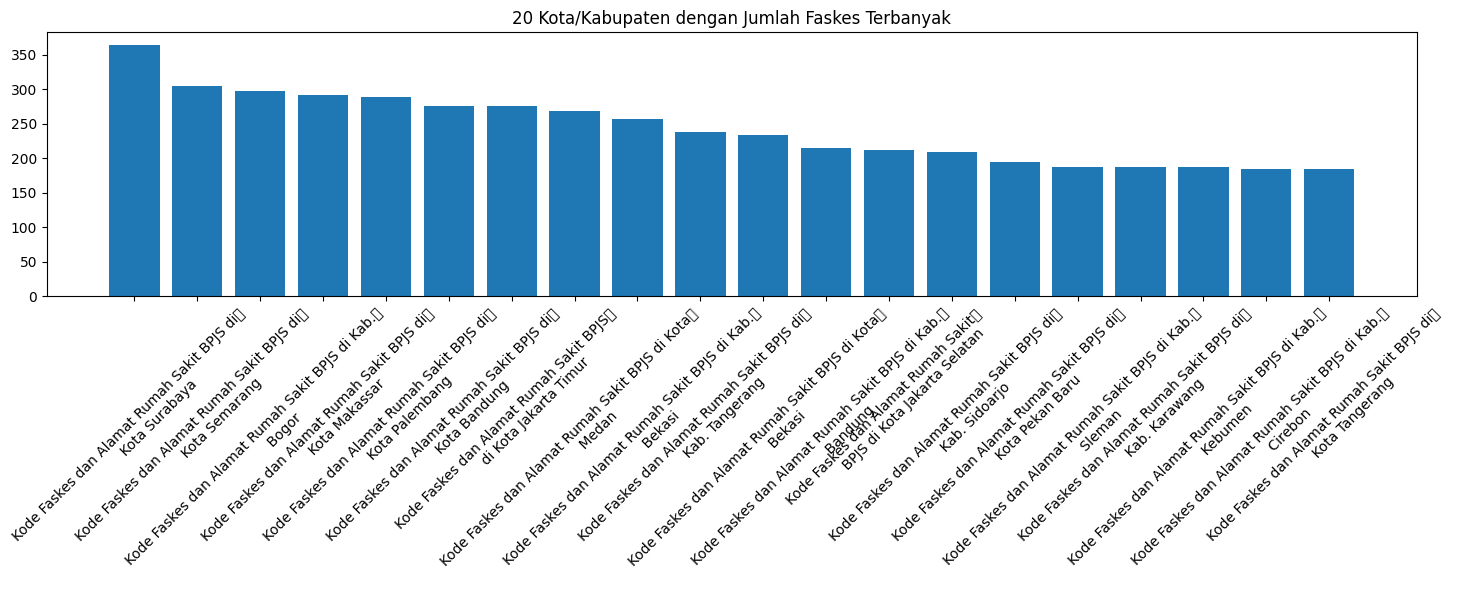

<Figure size 1500x800 with 0 Axes>

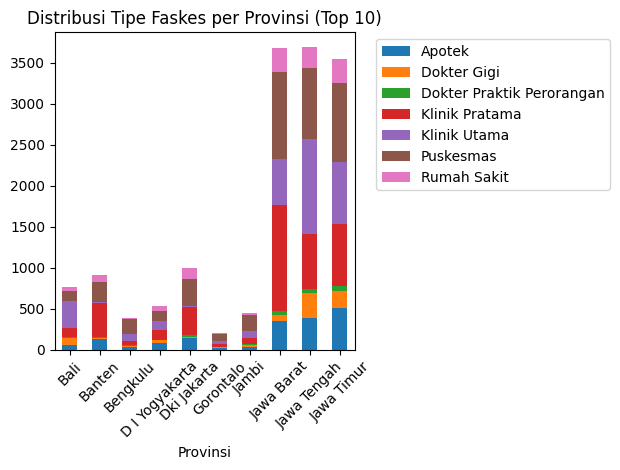

In [22]:
if __name__ == "__main__":
    # Load dan clean data
    df = load_and_clean_data()

    # Melakukan analisis
    prov_dist, type_dist, city_dist = analyze_distribution(df)
    density = analyze_density(df)
    type_distribution = analyze_type_distribution(df)

    # Generate laporan
    report = generate_report(df, prov_dist, type_dist, density)

    # Menyimpan hasil analisis
    df.to_csv('faskes_clean.csv', index=False)